# Check when JRA55-do v1.5.0.1 changes from preliminary to final

Run with 14 cores.

See https://climate.mri-jma.go.jp/pub/ocean/JRA55-do/

In [1]:
import xarray as xr
import glob
import matplotlib.pyplot as plt

In [2]:
def checkvars(ftuple):
    # dask makes it slower on 14 cores - don't bother
    # dss = [ xr.open_dataset(fn, decode_times=True, engine='netcdf4', chunks='auto') for fn in ftuple ]
    dss = [ xr.open_dataset(fn, decode_times=True, engine='netcdf4') for fn in ftuple ]
    vs = [ list(ds.keys()) for ds in dss ]
    vs_uniq = { v for sublist in vs for v in sublist }
    fieldnames = { k for ds in dss for k in list(ds.keys()) if len(ds[k].shape) == 3 }
    if len(fieldnames) != 1:
        print('Mismatched fields!')
    fieldname = list(fieldnames)[0]
    fields = [ ds[fieldname] for ds in dss ]
    print(fieldname, end='')
    fielddiffs = [ abs((f - fields[0])) for f in fields[1:] ]
    maxdiffs = [ f.max(dim=['lat','lon'], keep_attrs=True) for f in fielddiffs ]
    for ts in maxdiffs:
        ts_nonzero = (ts != 0.0).compute()
        ts_nonzero_times = ts.where(ts_nonzero, drop=True).time.values
        if len(ts_nonzero_times) > 0:
            print(' first differs at', repr(ts_nonzero_times[0]).split("'")[1])
        else:
            print(' identical')
        plt.figure()
        ts.plot()
        plt.title(fieldname+ ' max absolute difference')
    return maxdiffs

In [3]:
files = [
    glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231215*.nc'),
    glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231216*.nc')
]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231029*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231030*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231019*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231029*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230928*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231005*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230901*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230902*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230803*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230804*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230710*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230713*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/tas*20230710*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/tas*20230713*.nc')
# ]
if len(set([len(f) for f in files])) > 1:
    print('Number of files differs!')
for f in files:
    f.sort()

files = zip(*files)

prra identical
prsn identical
rlds identical
rsds identical
huss first differs at 2023-11-18T15:00:00.000000000
psl identical
tas first differs at 2023-11-18T15:00:00.000000000
ts identical
uas first differs at 2023-11-18T15:00:00.000000000
vas first differs at 2023-11-18T15:00:00.000000000
friver identical
licalvf identical
tos first differs at 2023-11-19T12:00:00.000000000
siconca identical
siconc first differs at 2023-12-03T12:00:00.000000000
CPU times: user 4min 42s, sys: 11min 47s, total: 16min 30s
Wall time: 17min 58s


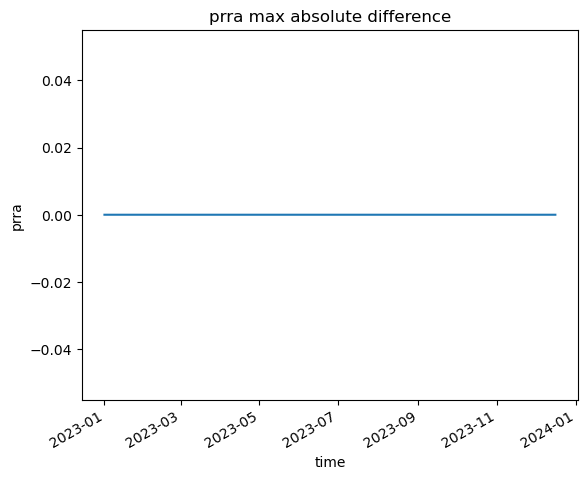

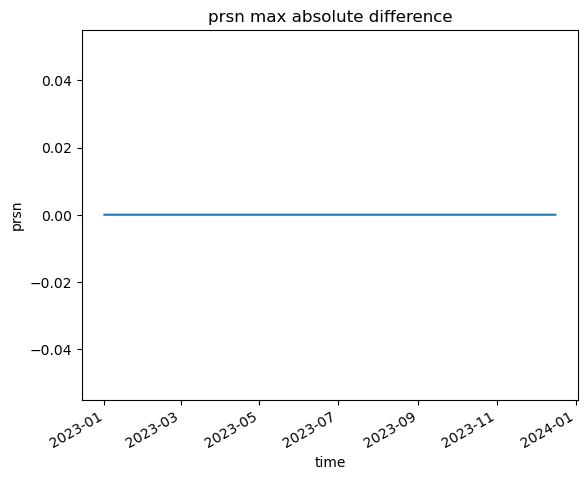

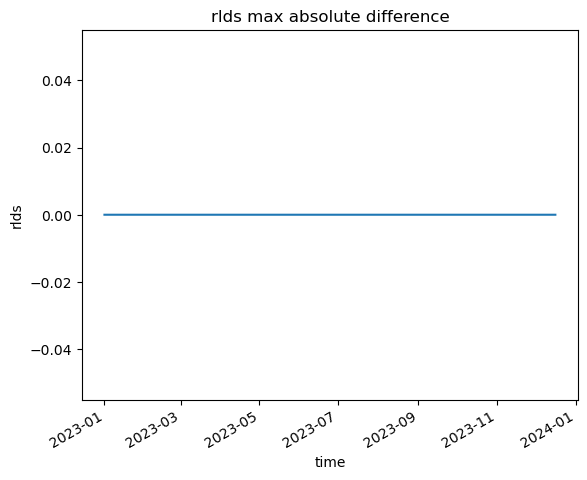

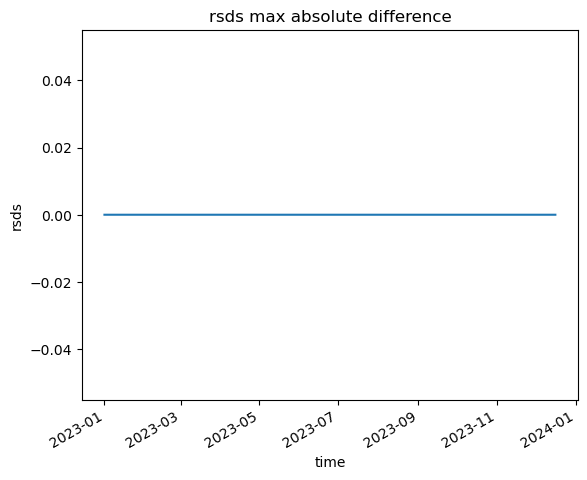

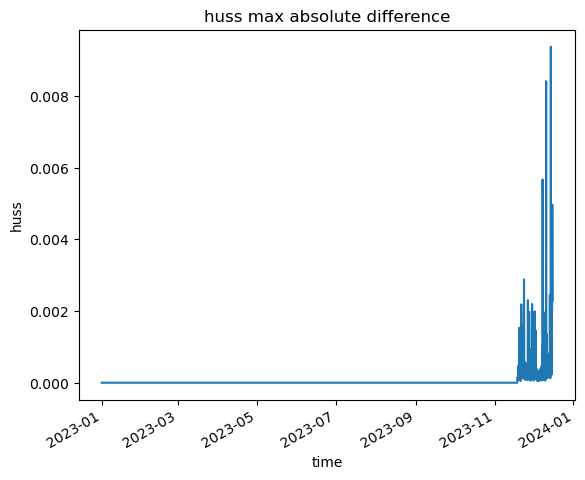

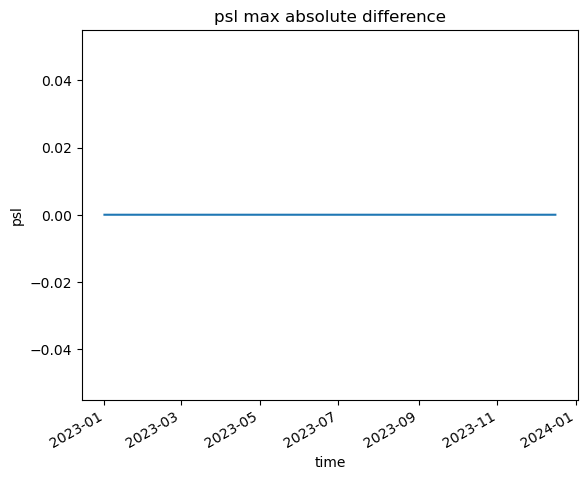

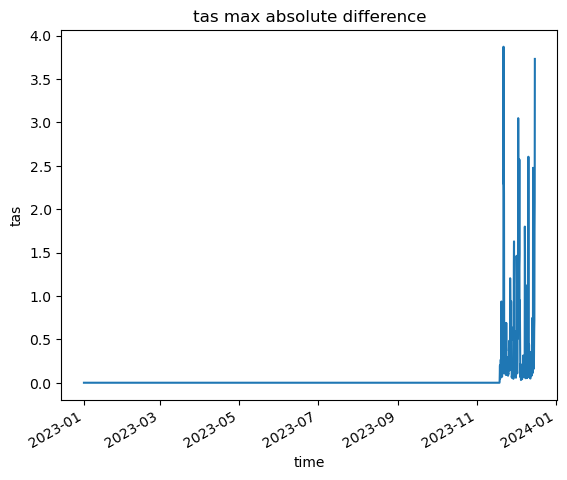

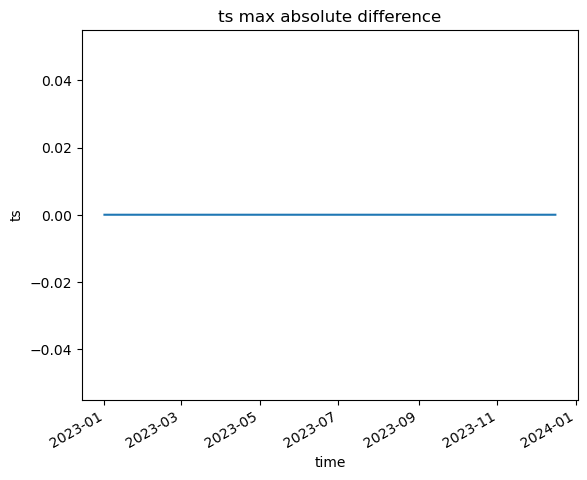

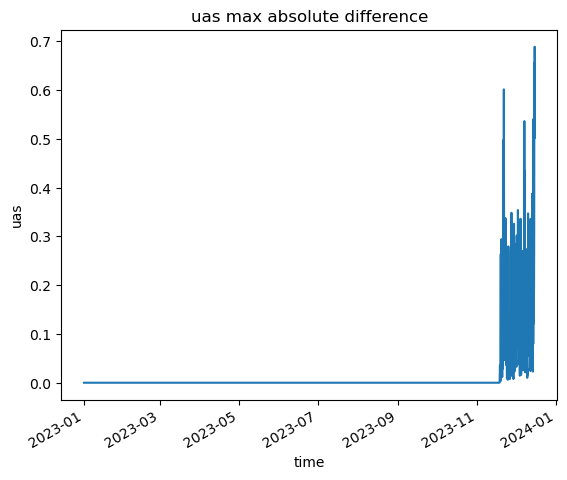

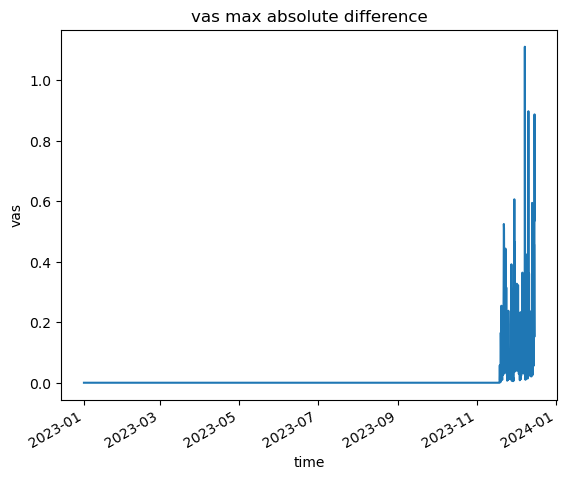

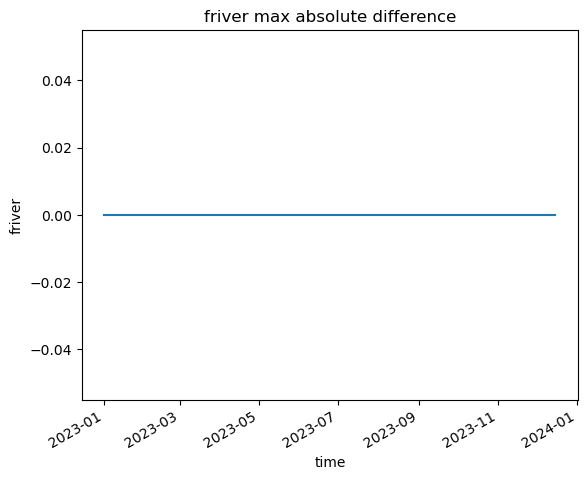

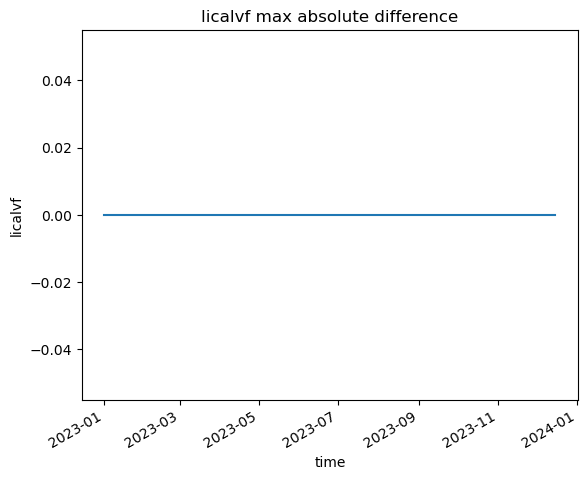

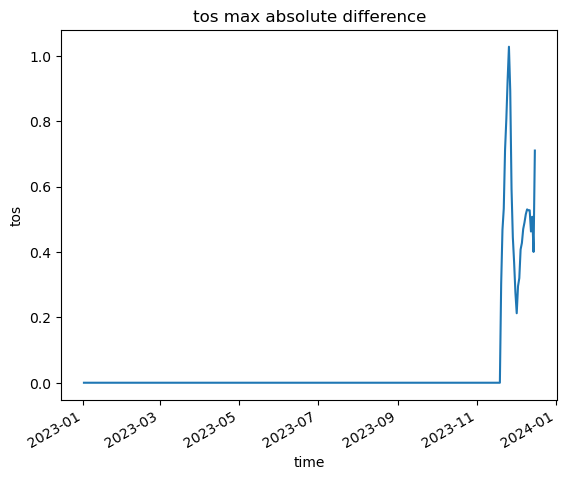

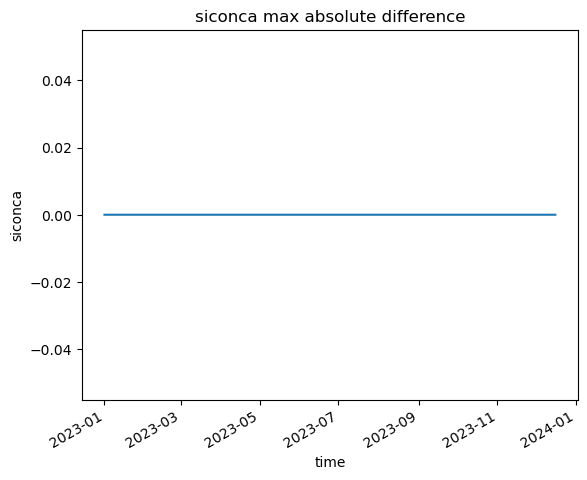

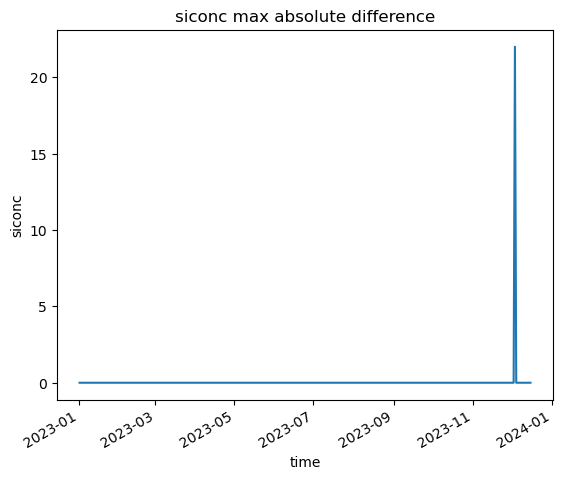

In [4]:
%%time
for ftuple in files:
    maxdiffs = checkvars(ftuple)